In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x = np.linspace(-3,3,100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [4]:
rng = np.random.RandomState(42)

y = np.sin(4*x) + x + rng.uniform(size=len(x))

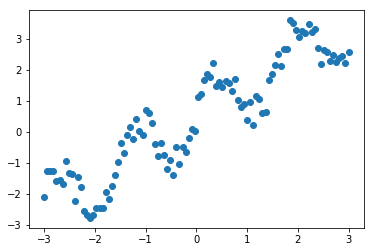

In [6]:
plt.plot(x,y,'o')

In [7]:
print("initially : ",x.shape)

X = x[:,np.newaxis]

print("now : ",X.shape)

initially :  (100,)
now :  (100, 1)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,
                                                   random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print('weight coefficients : ',reg.coef_)
print('y_axis intercept : ',reg.intercept_)

weight coefficients :  [0.90211711]
y_axis intercept :  0.44840974988268


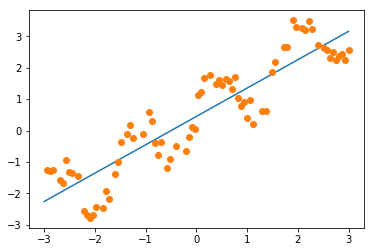

In [14]:
min_pt = X.min()*reg.coef_[0] + reg.intercept_
max_pt = X.max()*reg.coef_[0] + reg.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train,y_train,'o')

In [17]:
y_pred_train = reg.predict(X_train)

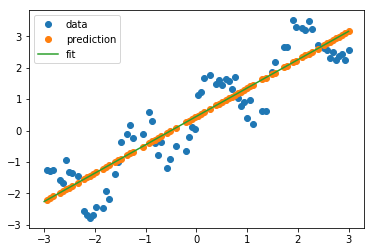

In [19]:
plt.plot(X_train, y_train, 'o', label='data')
plt.plot(X_train, y_pred_train, 'o', label='prediction')
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')

plt.legend(loc='upper left')


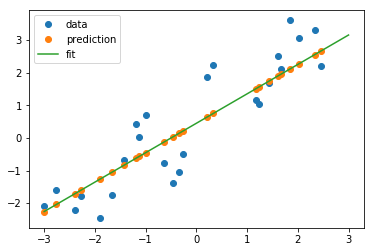

In [21]:
y_pred_test = reg.predict(X_test)

plt.plot(X_test, y_test, 'o', label='data')
plt.plot(X_test, y_pred_test, 'o', label='prediction')
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')

plt.legend(loc='upper left')


In [23]:
print('accuracy : ',reg.score(X_test,y_test))

accuracy :  0.7994321405079685


In [29]:
# adding a new feature 
# new feature will have value sin(4*x)

XX_train = np.concatenate((X_train, np.sin(4*X_train)), axis=1)
XX_test = np.concatenate((X_test, np.sin(4*X_test)), axis=1)

reg.fit(XX_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
y_pred_test_sine = reg.predict(XX_test)

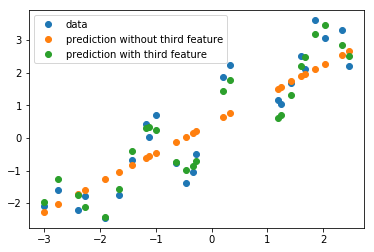

In [35]:
plt.plot(X_test, y_test, 'o', label='data')
plt.plot(X_test, y_pred_test, 'o', label='prediction without third feature')
plt.plot(X_test, y_pred_test_sine, 'o', label='prediction with third feature')

plt.legend(loc='upper left')

In [36]:
reg.score(XX_test,y_test)

0.9660402506947787